# ChatGPT Channel Break Out Detection

In [10]:
import pandas as pd
import ta
from ta.volatility import BollingerBands

# Load the data into a pandas DataFrame
#df = pd.read_csv("price_data.csv")
df = pd.read_csv("EURUSD_Candlestick_1_D_BID_04.05.2003-21.01.2023.csv")

# Calculate the 20-day moving average and the Bollinger Bands
df['ma20'] = df['Close'].rolling(window=20).mean()

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
# Add Bollinger Bands features
df['middle_band'] = indicator_bb.bollinger_mavg()
df['upper_band'] = indicator_bb.bollinger_hband()
df['lower_band'] = indicator_bb.bollinger_lband()
df


,Gmt time,Open,High,Low,Close,Volume,ma20,middle_band,upper_band,lower_band
0,04.05.2003 00:00:00.000,1.12273,1.12338,1.12160,1.12169,2.570405e+05,NaN,NaN,NaN,NaN
1,05.05.2003 00:00:00.000,1.12161,1.13009,1.12014,1.12924,1.276006e+06,NaN,NaN,NaN,NaN
2,06.05.2003 00:00:00.000,1.12921,1.14506,1.12723,1.14234,1.281467e+06,NaN,NaN,NaN,NaN
3,07.05.2003 00:00:00.000,1.14218,1.14323,1.13265,1.13494,1.272597e+06,NaN,NaN,NaN,NaN
4,08.05.2003 00:00:00.000,1.13507,1.15077,1.13006,1.14820,1.266581e+06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7198,17.01.2023 00:00:00.000,1.08294,1.08693,1.07744,1.07893,4.897173e+05,1.071285,1.071285,1.090142,1.052429
7199,18.01.2023 00:00:00.000,1.07891,1.08873,1.07661,1.07972,3.651476e+05,1.071971,1.071971,1.091006,1.052936
7200,19.01.2023 00:00:00.000,1.07974,1.08398,1.07821,1.08333,2.114397e+05,1.072625,1.072625,1.092268,1.052981
7201,20.01.2023 00:00:00.000,1.08332,1.08587,1.08022,1.08549,1.565040e+05,1.073386,1.073386,1.093770,1.053002


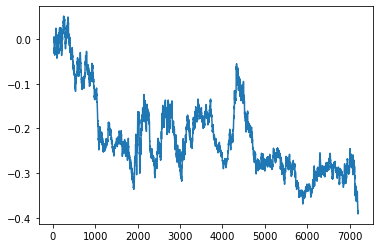

In [12]:
# Buy when the price breaks above the upper Bollinger Band
df['buy_signal'] = df['Close'] > df['upper_band']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the 20-day moving average
df['sell_signal'] = df['Close'] < df['ma20']
df.loc[df['sell_signal'] == True, 'Position'] = -1

# Forward fill the position column to ensure we hold onto our position 
# until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()

In [30]:
import tapy as ta
from tapy import Indicators

df = pd.read_csv("EURUSD_Candlestick_1_D_BID_04.05.2003-21.01.2023.csv")
# Calculate the fractal points
i = Indicators(df)
i.fractals(column_name_high='fractal_high', column_name_low='fractal_low')
df = i.df

# Buy when the price breaks above the fractal high
df['buy_signal'] = df['Close'] > df['fractal_high']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the fractal low
df['sell_signal'] = df['Close'] < df['fractal_low']
df.loc[df['sell_signal'] == True, 'Position'] = -1

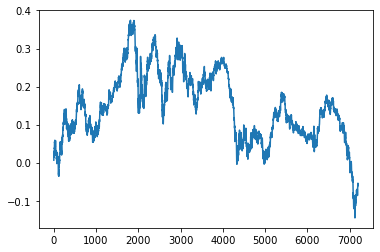

In [33]:

# Forward fill the position column to ensure we hold onto our position until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()


In [28]:
i = Indicators(df)
i.fractals(column_name_high='fractals_high', column_name_low='fractals_low')
df = i.df
df.tail()


,Gmt time,Open,High,Low,Close,Volume,AC,fractals_high,fractals_low
7198,17.01.2023 00:00:00.000,1.08294,1.08693,1.07744,1.07893,489717.3000,0.001334,False,False
7199,18.01.2023 00:00:00.000,1.07891,1.08873,1.07661,1.07972,365147.5798,0.000268,True,True
7200,19.01.2023 00:00:00.000,1.07974,1.08398,1.07821,1.08333,211439.6501,-0.000802,False,False
7201,20.01.2023 00:00:00.000,1.08332,1.08587,1.08022,1.08549,156504.0400,-0.001269,False,False
7202,21.01.2023 00:00:00.000,1.08549,1.08549,1.08549,1.08549,0.0000,-0.001210,False,False
